In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from transformers import pipeline
from PIL import Image

from jhu_handler import JHU_handler

# load pipe


pipe = pipeline(task="depth-estimation", model="depth-anything/Depth-Anything-V2-Small-hf")

# inference
# model.eval()

/home/gaetan/projects/projet-safeband/depth-measurement/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.48, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
Device set to use cpu


image 3967 with 16 heads


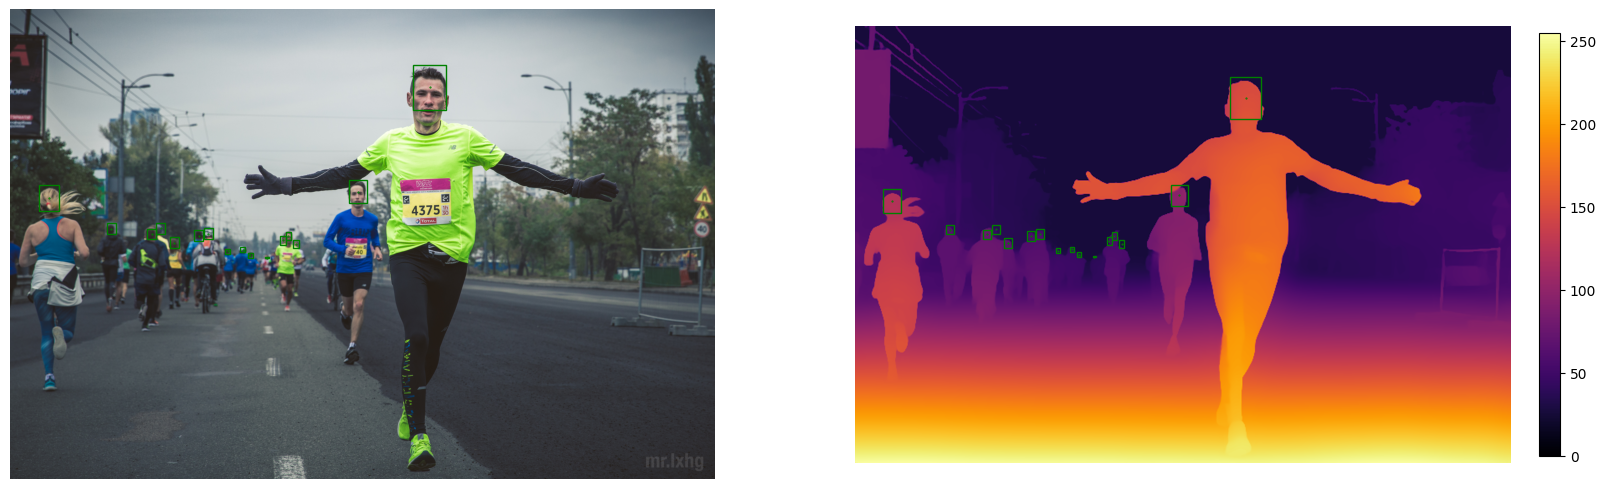

<Axes: xlabel='depth', ylabel='Count'>

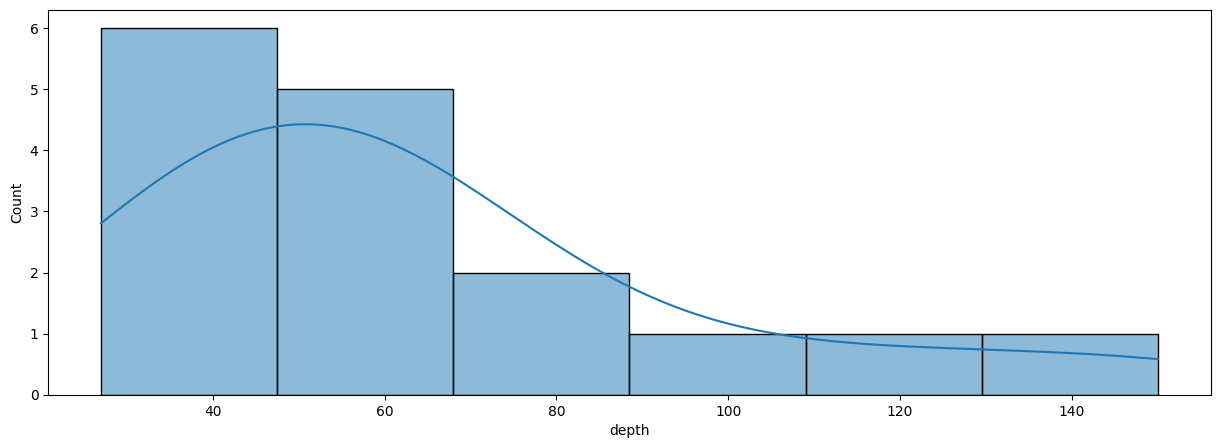

In [12]:


DB = JHU_handler()
img, heads, info = DB.get_random_image()
print(f"image {info['filename']} with {info['total-count']} heads")
depth : Image = pipe(img)["depth"]

fig, axes = plt.subplots(1, 2, figsize=(20, 10))
DB.show_img(img,ax=axes[0])
im2 = axes[1].imshow(depth, cmap='inferno')
for i in range(len(heads)):
    heads.loc[i, 'depth'] = depth.getpixel((int(heads.loc[i, 'x']), int(heads.loc[i, 'y'])))
#     heads.loc[i, 'depth'] = depth[int(heads.loc[i, 'y']), int(heads.loc[i, 'x'])]

DB.show_headboxes(heads, ax=axes[0])
DB.show_headboxes(heads, ax=axes[1])

# hide axis
axes[0].axis('off')
axes[1].axis('off')


fig.colorbar(im2, ax=axes[1], fraction=0.03, pad=0.04)
plt.show()


fig3, axes3 = plt.subplots( figsize=(15, 5))
sns.histplot(heads["depth"],ax=axes3,kde=True)



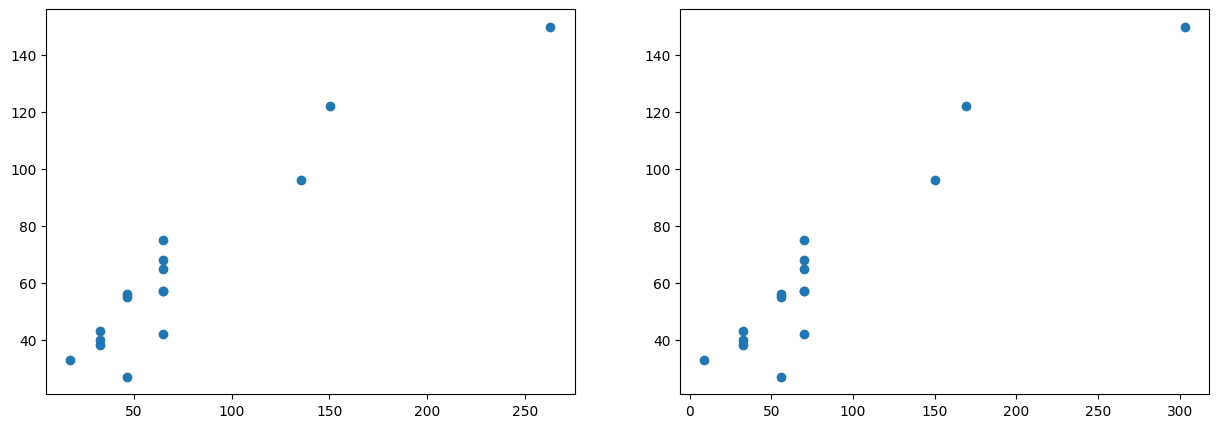

In [13]:
fig2, axes2 = plt.subplots(1, 2, figsize=(15, 5))

axes2[0].scatter((heads["w"]+heads["h"])/2,heads["depth"])
axes2[1].scatter(heads["h"],heads["depth"])